<a href="https://colab.research.google.com/github/andysingal/deep-learning/blob/main/PyTorch_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Real-world data representation using tensors

- Representing real-world data as PyTorch tensors
- Working with a range of data types
- Loading data from a file
- Converting data to tensors
- Shaping tensors so they can be used as inputs for neural network models


 Neural networks take tensors as input and produce tensors as outputs. In fact, all operations within a neural network and during optimization are operations between tensors

In [19]:
import numpy as np
import pandas as pd
import torch,os
torch.set_printoptions(edgeitems=2, threshold=50)

In [3]:
import imageio

img_arr = imageio.imread('/content/bobby.jpg')
type(img_arr)

<ipython-input-3-210eebcb43b1>:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img_arr = imageio.imread('/content/bobby.jpg')


imageio.core.util.Array

We can use the tensor’s permute method with the old dimensions for each new dimension to get to an appropriate layout.

In [4]:
img = torch.from_numpy(img_arr)
out = img.permute(2, 0, 1)

In [10]:
batch_size = 3
batch = torch.zeros(batch_size, 3, 256, 256, dtype=torch.uint8)

In [11]:
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)


import pathlib
data_dir = '/content/gdrive/MyDrive/image-cats'

imgdir_path = pathlib.Path('/content/gdrive/MyDrive/image-cats')

file_list = sorted([str(path) for path in imgdir_path.glob('*.png')])

print(file_list)
     


Mounted at /content/gdrive/
['/content/gdrive/MyDrive/image-cats/cat1.png', '/content/gdrive/MyDrive/image-cats/cat2.png', '/content/gdrive/MyDrive/image-cats/cat3.png']


In [13]:
filenames = [name for name in os.listdir(data_dir)
             if os.path.splitext(name)[-1] == '.png']

In [14]:
for i, filename in enumerate(filenames):
    img_arr = imageio.imread(os.path.join(data_dir, filename))
    img_t = torch.from_numpy(img_arr)
    img_t = img_t.permute(2, 0, 1)
    img_t = img_t[:3] # <1>
    batch[i] = img_t

<ipython-input-14-5b7dbb21e872>:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img_arr = imageio.imread(os.path.join(data_dir, filename))


Image shape:  (256, 256, 3)
Image shape:  (256, 256, 3)
Image shape:  (256, 256, 3)


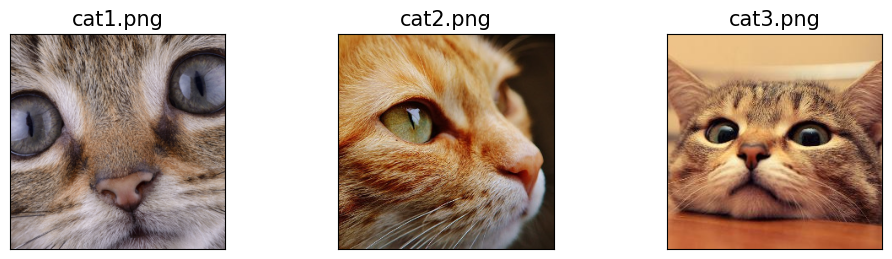

In [8]:
import matplotlib.pyplot as plt
import os
from PIL import Image


fig = plt.figure(figsize=(10, 5))
for i, file in enumerate(file_list):
    img = Image.open(file)
    print('Image shape: ', np.array(img).shape)
    ax = fig.add_subplot(2, 3, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(img)
    ax.set_title(os.path.basename(file), size=15)
    
#plt.savefig('figures/12_03.pdf')
plt.tight_layout()
plt.show()

#Normalizing the data
We mentioned earlier that neural networks usually work with floating-point tensors as their input. Neural networks exhibit the best training performance when the input data ranges roughly from 0 to 1, or from -1 to 1

In [15]:
batch = batch.float()
batch /= 255.0

In [16]:
n_channels = batch.shape[1]
for c in range(n_channels):
    mean = torch.mean(batch[:, c])
    std = torch.std(batch[:, c])
    batch[:, c] = (batch[:, c] - mean) / std

In working with images, it is good practice to compute the mean and standard deviation on all the training data in advance and then subtract and divide by these fixed, precomputed quantities

#Representing tabular data

Our first job as deep learning practitioners is to encode heterogeneous, real-world data into a tensor of floating-point numbers, ready for consumption by a neural network. 

In [38]:
import csv

Before we can get to that, however, we need to be able to examine the data in a more usable way than opening the file in a text editor. Let’s see how we can load the data using Python and then turn it into a PyTorch tensor. Python offers several options for quickly loading a CSV file. Three popular options are

- The csv module that ships with Python

- NumPy

- Pandas

In [36]:
# df = pd.read_csv('/content/winequality-white.csv',delimiter=";")
# df.head()
wine_path='/content/winequality-white.csv'
wineq_numpy = np.loadtxt(wine_path, dtype=np.float32, delimiter=";",
                         skiprows=1)
wineq_numpy

array([[ 7.  ,  0.27,  0.36, ...,  0.45,  8.8 ,  6.  ],
       [ 6.3 ,  0.3 ,  0.34, ...,  0.49,  9.5 ,  6.  ],
       [ 8.1 ,  0.28,  0.4 , ...,  0.44, 10.1 ,  6.  ],
       ...,
       [ 6.5 ,  0.24,  0.19, ...,  0.46,  9.4 ,  6.  ],
       [ 5.5 ,  0.29,  0.3 , ...,  0.38, 12.8 ,  7.  ],
       [ 6.  ,  0.21,  0.38, ...,  0.32, 11.8 ,  6.  ]], dtype=float32)

In [39]:
col_list = next(csv.reader(open(wine_path), delimiter=';'))

wineq_numpy.shape, col_list

((4898, 12),
 ['fixed acidity',
  'volatile acidity',
  'citric acid',
  'residual sugar',
  'chlorides',
  'free sulfur dioxide',
  'total sulfur dioxide',
  'density',
  'pH',
  'sulphates',
  'alcohol',
  'quality'])

In [40]:
wineq = torch.from_numpy(wineq_numpy)

wineq.shape, wineq.dtype


(torch.Size([4898, 12]), torch.float32)

In [41]:
data = wineq[:, :-1] # <1>
data, data.shape

(tensor([[ 7.0000,  0.2700,  ...,  0.4500,  8.8000],
         [ 6.3000,  0.3000,  ...,  0.4900,  9.5000],
         ...,
         [ 5.5000,  0.2900,  ...,  0.3800, 12.8000],
         [ 6.0000,  0.2100,  ...,  0.3200, 11.8000]]),
 torch.Size([4898, 11]))

In [42]:
target = wineq[:, -1] # <2>
target, target.shape

(tensor([6., 6.,  ..., 7., 6.]), torch.Size([4898]))

#TRANSFORMATION
If we want to transform the target tensor in a tensor of labels, 

In [44]:
target = wineq[:, -1].long()
target

tensor([6, 6,  ..., 7, 6])

#One-hot encoding
The other approach is to build a one-hot encoding of the scores: that is, encode each of the 10 scores in a vector of 10 elements, with all elements set to 0 but one, at a different index for each score.

Note that the fact that the score corresponds to the index of the nonzero element is purely incidental: we could shuffle the assignment, and nothing would change from a classification standpoint.

We can achieve one-hot encoding using the scatter_ method, which fills the tensor with values from a source tensor along the indices provided as arguments:

The arguments for scatter_ are as follows:

- The dimension along which the following two arguments are specified

- A column tensor indicating the indices of the elements to scatter

- A tensor containing the elements to scatter or a single scalar to scatter (1, in this case)

In [45]:
target_onehot = torch.zeros(target.shape[0], 10)

target_onehot.scatter_(1, target.unsqueeze(1), 1.0)

tensor([[0., 0.,  ..., 0., 0.],
        [0., 0.,  ..., 0., 0.],
        ...,
        [0., 0.,  ..., 0., 0.],
        [0., 0.,  ..., 0., 0.]])

In [46]:
target_unsqueezed = target.unsqueeze(1)
target_unsqueezed

tensor([[6],
        [6],
        ...,
        [7],
        [6]])

# When to categorize

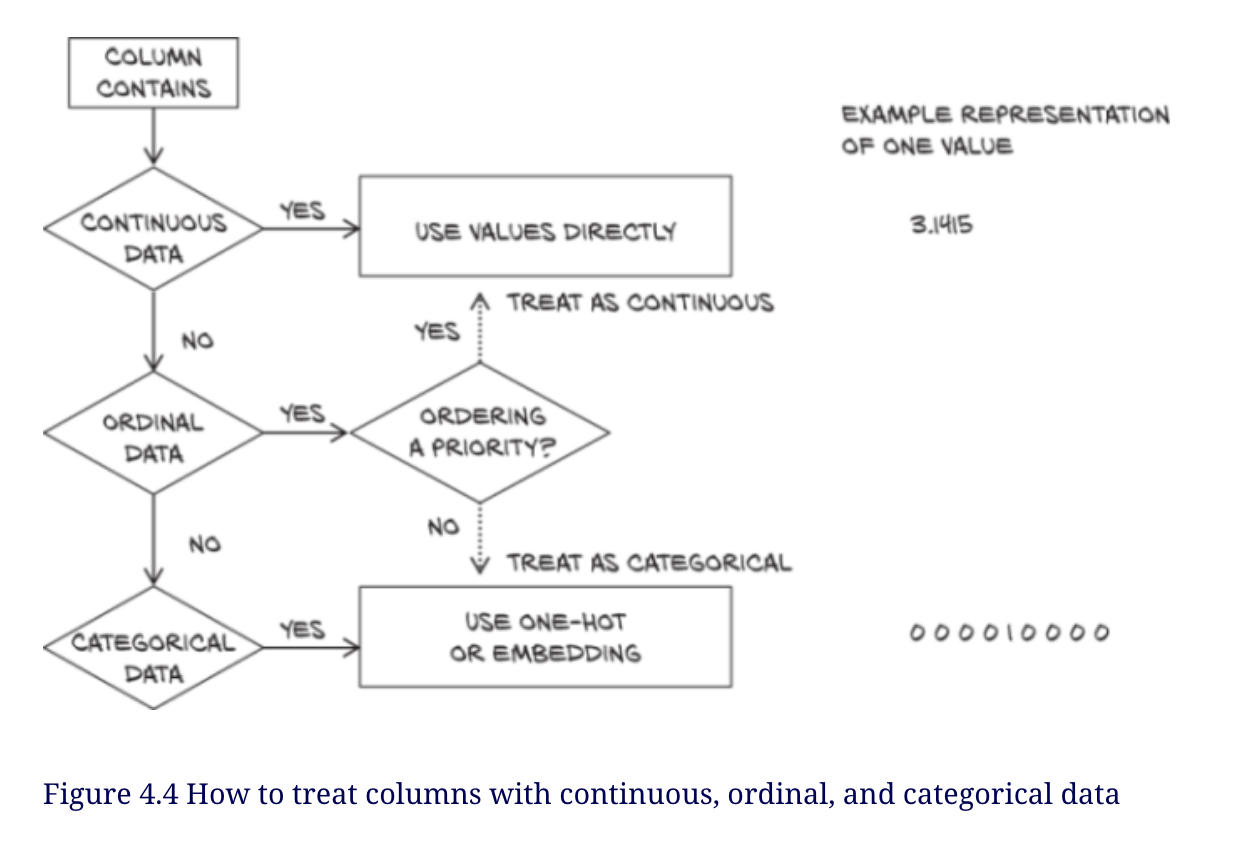

In [47]:
data_mean = torch.mean(data, dim=0)
data_var = torch.var(data, dim=0)

In this case, dim=0 indicates that the reduction is performed along dimension 0. At this point, we can normalize the data by subtracting the mean and dividing by the standard deviation

In [48]:
data_normalized = (data - data_mean) / torch.sqrt(data_var)
data_normalized

tensor([[ 1.7208e-01, -8.1761e-02,  ..., -3.4915e-01, -1.3930e+00],
        [-6.5743e-01,  2.1587e-01,  ...,  1.3422e-03, -8.2419e-01],
        ...,
        [-1.6054e+00,  1.1666e-01,  ..., -9.6251e-01,  1.8574e+00],
        [-1.0129e+00, -6.7703e-01,  ..., -1.4882e+00,  1.0448e+00]])

#Finding thresholds

let’s start to look at the data with an eye to seeing if there is an easy way to tell good and bad wines apart at a glance. First, we’re going to determine which rows in target correspond to a score less than or equal to 3:

In [50]:
bad_indexes = target <= 3 # <1>
bad_indexes.shape, bad_indexes.dtype, bad_indexes.sum()
#yTorch also provides comparison functions, here torch.le(target, 3), but using operators seems to be a good standard.

(torch.Size([4898]), torch.bool, tensor(20))

In [51]:
bad_data = data[bad_indexes]
bad_data.shape

torch.Size([20, 11])

In [52]:
bad_data = data[target <= 3]
mid_data = data[(target > 3) & (target < 7)] # <1>
good_data = data[target >= 7]

bad_mean = torch.mean(bad_data, dim=0)
mid_mean = torch.mean(mid_data, dim=0)
good_mean = torch.mean(good_data, dim=0)

for i, args in enumerate(zip(col_list, bad_mean, mid_mean, good_mean)):
    print('{:2} {:20} {:6.2f} {:6.2f} {:6.2f}'.format(i, *args))

 0 fixed acidity          7.60   6.89   6.73
 1 volatile acidity       0.33   0.28   0.27
 2 citric acid            0.34   0.34   0.33
 3 residual sugar         6.39   6.71   5.26
 4 chlorides              0.05   0.05   0.04
 5 free sulfur dioxide   53.33  35.42  34.55
 6 total sulfur dioxide 170.60 141.83 125.25
 7 density                0.99   0.99   0.99
 8 pH                     3.19   3.18   3.22
 9 sulphates              0.47   0.49   0.50
10 alcohol               10.34  10.26  11.42


We could use a threshold on total sulfur dioxide as a crude criterion for discriminating good wines from bad ones.

Let’s get the indexes where the total sulfur dioxide column is below the midpoint we calculated earlier

In [53]:
total_sulfur_threshold = 141.83
total_sulfur_data = data[:,6]
predicted_indexes = torch.lt(total_sulfur_data, total_sulfur_threshold)

predicted_indexes.shape, predicted_indexes.dtype, predicted_indexes.sum()

(torch.Size([4898]), torch.bool, tensor(2727))

This means our threshold implies that just over half of all the wines are going to be high quality. Next, we’ll need to get the indexes of the actually good wines:

In [54]:
actual_indexes = target > 5

actual_indexes.shape, actual_indexes.dtype, actual_indexes.sum()

(torch.Size([4898]), torch.bool, tensor(3258))

@Since there are about 500 more actually good wines than our threshold predicted, we already have hard evidence that it’s not perfect. Now we need to see how well our predictions line up with the actual rankings. We will perform a logical “and” between our prediction indexes and the actual good indexes (remember that each is just an array of zeros and ones) and use that intersection of wines-in-agreement to determine how well we did:

In [55]:
n_matches = torch.sum(actual_indexes & predicted_indexes).item()
n_predicted = torch.sum(predicted_indexes).item()
n_actual = torch.sum(actual_indexes).item()

n_matches, n_matches / n_predicted, n_matches / n_actual

(2018, 0.74000733406674, 0.6193984039287906)

We got around 2,000 wines right! Since we predicted 2,700 wines, this gives us a 74% chance that if we predict a wine to be high quality, it actually is. Unfortunately, there are 3,200 good wines, and we only identified 61% of them. Well, we got what we signed up for; that’s barely better than random! Of course, this is all very naive: we know for sure that multiple variables contribute to wine quality, and the relationships between the values of these variables and the outcome (which could be the actual score, rather than a binarized version of it) is likely more complicated than a simple threshold on a single value.

Indeed, a simple neural network would overcome all of these limitations, as would a lot of other basic machine learning methods. We’ll have the tools to tackle this problem after the next two chapters, once we have learned how to build our first neural network from scratch. We will also revisit how to better grade our results in chapter 12. Let’s move on to other data types for now.